<a href="https://colab.research.google.com/github/IhsanMaulidin/Tugas-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from numpy.random import normal

In [2]:
df = pd.read_excel('/content/marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Drop date columns if present
if 'Dt_Customer' in df.columns:
    df = df.drop(columns=['Dt_Customer', ])

In [5]:
df.dropna(inplace=True)

In [6]:
# Pilih data dengan dua kelas yang seimbang
class_0 = df[df['Response'] == 0]
class_1 = df[df['Response'] == 1]

# Pastikan kedua kelas memiliki jumlah data yang cukup
num_samples = min(len(class_0), len(class_1), 50)  # 50 data dari setiap kelas

class_0_sample = class_0.sample(n=num_samples, random_state=42)
class_1_sample = class_1.sample(n=num_samples, random_state=42)

# Gabungkan kedua sampel
data_sampled = pd.concat([class_0_sample, class_1_sample])

# Pisahkan fitur dan label
X_sampled = data_sampled.drop('Response', axis=1)
y_sampled = data_sampled['Response']

In [7]:
data_sampled

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1797,2952,1977,Master,Single,36273.0,1,0,80,29,3,...,6,0,0,0,0,0,0,3,11,0
1472,4706,1966,Graduation,Single,34704.0,0,1,65,29,0,...,5,0,0,0,0,0,0,3,11,0
935,6383,1971,PhD,Together,32892.0,1,0,78,26,0,...,8,0,0,0,0,0,0,3,11,0
885,4597,1970,PhD,Together,82072.0,0,0,67,889,55,...,1,0,0,0,0,0,0,3,11,0
835,9904,1956,Graduation,Married,71391.0,0,1,50,336,123,...,3,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,9671,1968,Graduation,Married,19514.0,1,1,47,14,3,...,8,1,0,0,0,0,0,3,11,1
1865,3678,1973,Graduation,Widow,60208.0,1,1,13,488,23,...,7,0,1,0,0,0,0,3,11,1
338,9560,1965,Graduation,Together,83003.0,0,0,18,856,61,...,3,0,0,1,0,0,0,3,11,1
753,3667,1969,Graduation,Married,80952.0,0,0,20,778,178,...,8,0,1,1,1,0,0,3,11,1


In [8]:
X_sampled= pd.get_dummies(X_sampled, columns=['Education', 'Marital_Status'])

In [9]:
# Normalize the features
scaler = StandardScaler()
X_sampled = scaler.fit_transform(X_sampled)

In [10]:
from sklearn.decomposition import PCA
# Feature Selection using PCA
pca = PCA(n_components=10)
X_sampled= pca.fit_transform(X_sampled)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [12]:
# Augmentasi dengan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Augmentasi dengan Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [23]:
# Definisikan kombinasi neighbors dan distance metrics
combinations = [
    (9, 'euclidean'),
    (7, 'manhattan'),
    (6, 'minkowski')
]

for neighbors, metric in combinations:
    print(f'KNN dengan {neighbors} neighbors dan {metric} distance metric')

    # Model tanpa augmentasi
    knn = KNeighborsClassifier(n_neighbors=neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Tanpa Augmentasi')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Model dengan SMOTE
    knn.fit(X_train_smote, y_train_smote)
    y_pred_smote = knn.predict(X_test)
    print('Dengan SMOTE')
    print('Accuracy:', accuracy_score(y_test, y_pred_smote))
    print(classification_report(y_test, y_pred_smote))
    print(confusion_matrix(y_test, y_pred_smote))

    # Model dengan Random Under Sampling
    knn.fit(X_train_rus, y_train_rus)
    y_pred_rus = knn.predict(X_test)
    print('Dengan Random Under Sampling')
    print('Accuracy:', accuracy_score(y_test, y_pred_rus))
    print(classification_report(y_test, y_pred_rus))
    print(confusion_matrix(y_test, y_pred_rus))
    print('\n' + '-'*80 + '\n')

KNN dengan 9 neighbors dan euclidean distance metric
Tanpa Augmentasi
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.83      0.62      0.71         8

    accuracy                           0.80        20
   macro avg       0.81      0.77      0.78        20
weighted avg       0.80      0.80      0.79        20

[[11  1]
 [ 3  5]]
Dengan SMOTE
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.80      0.50      0.62         8

    accuracy                           0.75        20
   macro avg       0.77      0.71      0.72        20
weighted avg       0.76      0.75      0.74        20

[[11  1]
 [ 4  4]]
Dengan Random Under Sampling
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.80      0.50      0.62

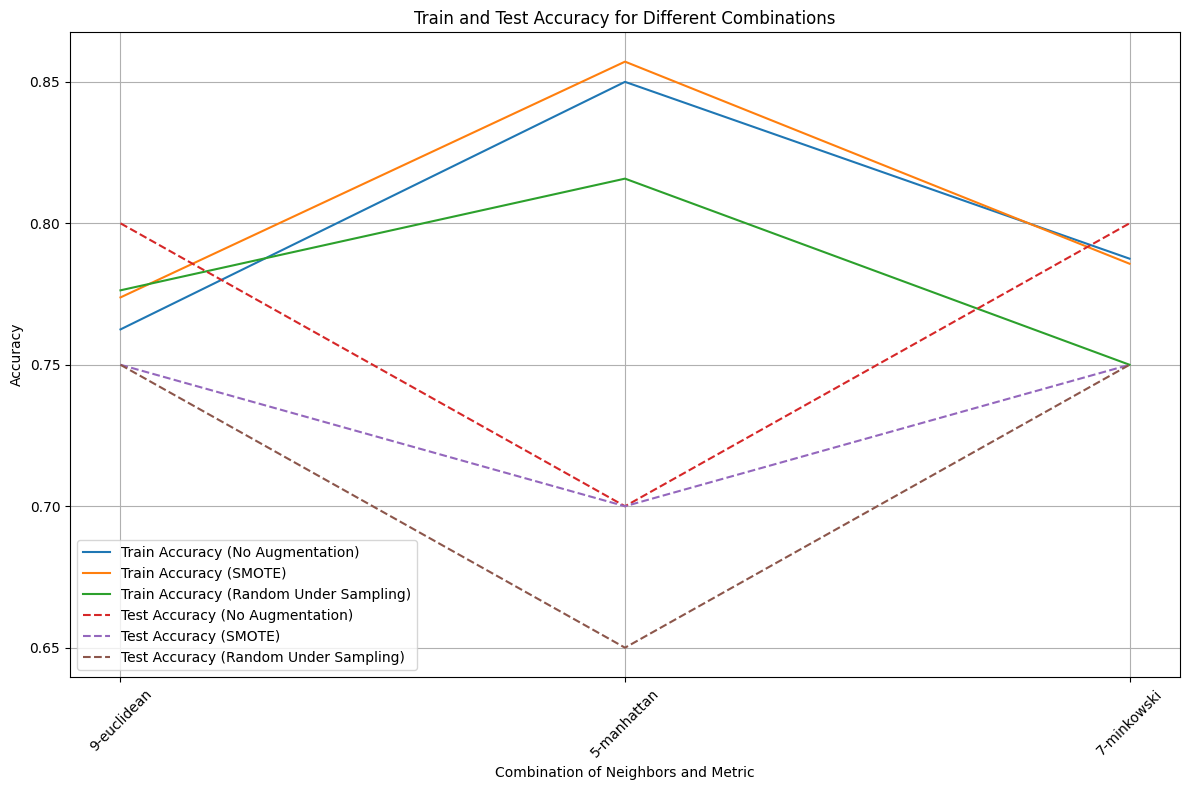

In [ ]:
import matplotlib.pyplot as plt

train_accuracies = {'No Augmentation': [], 'SMOTE': [], 'Random Under Sampling': []}
test_accuracies = {'No Augmentation': [], 'SMOTE': [], 'Random Under Sampling': []}

for neighbors, metric in combinations:
    knn = KNeighborsClassifier(n_neighbors=neighbors, metric=metric)

    # Model tanpa augmentasi
    knn.fit(X_train, y_train)
    train_accuracies['No Augmentation'].append(knn.score(X_train, y_train))
    test_accuracies['No Augmentation'].append(knn.score(X_test, y_test))

    # Model dengan SMOTE
    knn.fit(X_train_smote, y_train_smote)
    train_accuracies['SMOTE'].append(knn.score(X_train_smote, y_train_smote))
    test_accuracies['SMOTE'].append(knn.score(X_test, y_test))

    # Model dengan Random Under Sampling
    knn.fit(X_train_rus, y_train_rus)
    train_accuracies['Random Under Sampling'].append(knn.score(X_train_rus, y_train_rus))
    test_accuracies['Random Under Sampling'].append(knn.score(X_test, y_test))

# Plotting
plt.figure(figsize=(12, 8))

# Plot Train Accuracy
for augmentation_type, train_accuracy_list in train_accuracies.items():
    plt.plot([f'{neighbors}-{metric}' for neighbors, metric in combinations], train_accuracy_list, label=f'Train Accuracy ({augmentation_type})')

# Plot Test Accuracy
for augmentation_type, test_accuracy_list in test_accuracies.items():
    plt.plot([f'{neighbors}-{metric}' for neighbors, metric in combinations], test_accuracy_list, label=f'Test Accuracy ({augmentation_type})', linestyle='dashed')

plt.xlabel('Combination of Neighbors and Metric')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different Combinations')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()